<a href="https://colab.research.google.com/github/JNarimatsu/Bootcamp_Avanti_2025.3/blob/main/Entrega_01_analise_exploratoria_de_dados_XI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados
 - Conjunto de dados: `laptop_price` (Preços de laptops)
 - Cientistas de dados:
    Juliana Narimatsu
---

## Preparação
 - Carregamento de bibliotecas
 - Configuração de estilo dos gráficos
 - Leitura do conjunto de dados

In [35]:
import itertools
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown

#Este trecho de código configura o estilo visual para os gráficos criados usando a biblioteca seaborn.
# sns.set_style("whitegrid")
sns.set_theme(style="whitegrid", palette="colorblind")

palette_dict = {
    'day': 'Set1',   # Exemplo de paleta para 'day'
    'time': 'Dark2', # Exemplo de paleta para 'time'
    'smoker': 'coolwarm', # Paleta para 'smoker'
    'sex': 'Pastel1',   # Paleta para 'sex'
}

In [36]:
# @title Leitura do conjunto de dados
df_prices_latop = pd.read_csv(
    'https://raw.githubusercontent.com/atlantico-academy/datasets/main/laptop_price.csv', encoding='latin-1', sep=','
)

In [37]:
# @title Informações iniciais
display(Markdown("### Primeiras linhas"))
display(df_prices_latop.head())

display(Markdown("### Ultimas linhas"))
display(df_prices_latop.tail())

display(Markdown("### Informação das variáveis"))
df_prices_latop.info()

display(Markdown("### Quantidade de valores únicos"))
df_prices_latop.nunique()

### Primeiras linhas

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Ultimas linhas

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### Quantidade de valores únicos

,0
laptop_ID,1303
Company,19
Product,618
TypeName,6
Inches,18
ScreenResolution,40
Cpu,118
Ram,9
Memory,39
Gpu,110


In [38]:
# @title Dicionário de dados
df_dict_prices = pd.DataFrame([
    {
        "variavel": "laptop_ID",
        "descricao": "Identificação do laptop",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Company",
        "descricao": "Fabricante do laptop",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Product",
        "descricao": "Modelo do laptop",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "TypeName",
        "descricao": "Tipo de Laptop",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Inches",
        "descricao": "Polegadas",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "ScreenResolution",
        "descricao": "Polegadas da tela",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Cpu",
        "descricao": "Qual cpu utilizada no laptop",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
     {  # A princípio Ram e Memoria foram classificadas como qualitativas doscretas, mas foi verificado que para as análises fazia mais sentido classificadas como qualitativas ordinais.
        "variavel": "Ram",
        "descricao": "Quantidade de memória ram em gigas",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Memory",
        "descricao": "Quantidade de memória em gigas",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Gpu",
        "descricao": "Qual gpu utilizada no laptop",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "OpSys",
        "descricao": "Qual sistema operacional o laptop utiliza",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
      "variavel": "Weight",
        "descricao": "Peso do laptop",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "Price_euros",
        "descricao": "Preço do laptop",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    }
])
display(Markdown("###Dicionário de dados"))
display(df_dict_prices)

display(Markdown('### Tipos de dados'))
display(df_dict_prices.value_counts(["tipo","subtipo"]).rename("qtde").reset_index())

###Dicionário de dados

,variavel,descricao,tipo,subtipo
0,laptop_ID,Identificação do laptop,quantitativa,discreta
1,Company,Fabricante do laptop,qualitativa,nominal
2,Product,Modelo do laptop,qualitativa,nominal
3,TypeName,Tipo de Laptop,qualitativa,nominal
4,Inches,Polegadas,quantitativa,contínua
5,ScreenResolution,Polegadas da tela,qualitativa,ordinal
6,Cpu,Qual cpu utilizada no laptop,qualitativa,ordinal
7,Ram,Quantidade de memória ram em gigas,qualitativa,ordinal
8,Memory,Quantidade de memória em gigas,qualitativa,ordinal
9,Gpu,Qual gpu utilizada no laptop,qualitativa,ordinal


### Tipos de dados

,tipo,subtipo,qtde
0,qualitativa,ordinal,5
1,qualitativa,nominal,4
2,quantitativa,contínua,3
3,quantitativa,discreta,1


In [39]:
#Transformando a variável em float, "regex" pega apenas a parte numérica e transforma em float
df_prices_latop['Weight'] = df_prices_latop['Weight'].str.replace("kg", "", regex=False).astype(float)

df_prices_latop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


---
A partir das informações iniciais, podemos dizer que:
 - O conjunto de dados tem 1303 unidades amostrais com 13 variáveis
 - Classificação das variáveis:
    - Quantitativa contínua: `inches(polegadas)`, `Weight (Peso)`, `Price-euros`
    - Quantitativa discreta: `laptop_ID`
    - Qualitativa nominal: `Company`, `Product`, `TypeName`, `OpSys`,
    - Qualitativa ordinal: `ScreenResolution`, `Cpu`,  `Ram`, `Memory`, `Gpu`
---

## Descrição dos dados

## Análise univariada

In [56]:
# @title Resumo estatístico

#display(Markdown("### Variáveis qualitativas"))
#print(df_prices_latop.describe(include='object'))

#display(Markdown("### Variáveis quantitativas"))
#print(df_prices_latop.describe())

num_cols = df_prices_latop.select_dtypes(include=["number"]).columns.tolist() #Identifica as colunas numéricas no DataFrame / .tolist() - converte os nomes das colunas em uma lista Python.
cat_cols = [c for c in df_prices_latop.columns if c not in num_cols] #Criando uma lista apenas com as colunas que não estão presentes na lista num_cols, somente com as colunas qualitativas.


display(Markdown("### Estatísticas descritivas — quantitativas"))
if num_cols:
    display(df_prices_latop[num_cols].describe().T)

display(Markdown("### Tabelas de frequência — qualitativas (top 10)"))
for c in cat_cols:
    vc = df_prices_latop[c].value_counts(dropna=False).head(10)
    display(vc.to_frame(name="contagem"))




### Estatísticas descritivas — quantitativas

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.00,331.5,659.00,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
Weight,1303.0,2.038734,0.665475,0.69,1.5,2.04,2.30,4.7
Price_euros,1303.0,1123.686992,699.009043,174.00,599.0,977.00,1487.88,6099.0


### Tabelas de frequência — qualitativas (top 10)

,contagem
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


,contagem
Product,
XPS 13,30
Inspiron 3567,29
250 G6,21
Vostro 3568,19
Legion Y520-15IKBN,19
Inspiron 5570,18
ProBook 450,18
Alienware 17,15
Inspiron 5567,14


,contagem
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


,contagem
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


,contagem
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
Intel Core i5 6200U 2.3GHz,68
Intel Core i3 6006U 2GHz,64
Intel Core i7 6500U 2.5GHz,49
Intel Core i7 6700HQ 2.6GHz,43


,contagem
Ram,
8GB,619
4GB,375
16GB,200
6GB,41
12GB,25
2GB,22
32GB,17
24GB,3
64GB,1


,contagem
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


,contagem
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
Nvidia GeForce 940MX,43
AMD Radeon 530,41
Intel HD Graphics 500,39
Intel HD Graphics 400,37


,contagem
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


---
 - `Dell` e `Lenovo` são as fabricantes mais frequentes, e o modelo `Dell` `XPS 13` sendo o mais frequente.
 - A configuração mais comum é uma CPU `Intel Core i5 7200U 2.5GHz`, `8GB ` de Ram, `256GB ` de memória SSD com uma GPU `Intel HD Graphics 620`.
 - O sistema operacional mais utilizado é o `Windows 10`
 - O peso médio é `2.038kg`.
 - A média de tamanho de tela é de `15 polegadas` com o menor tendo `10.10 polegadas` e o maior `18.4 polegadas`
 - O preço médio é de `1123.68 euros` variando de `174.00` a `6099.00` euros

---

In [45]:
df_prices_latop["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

### Distribuição de variáveis

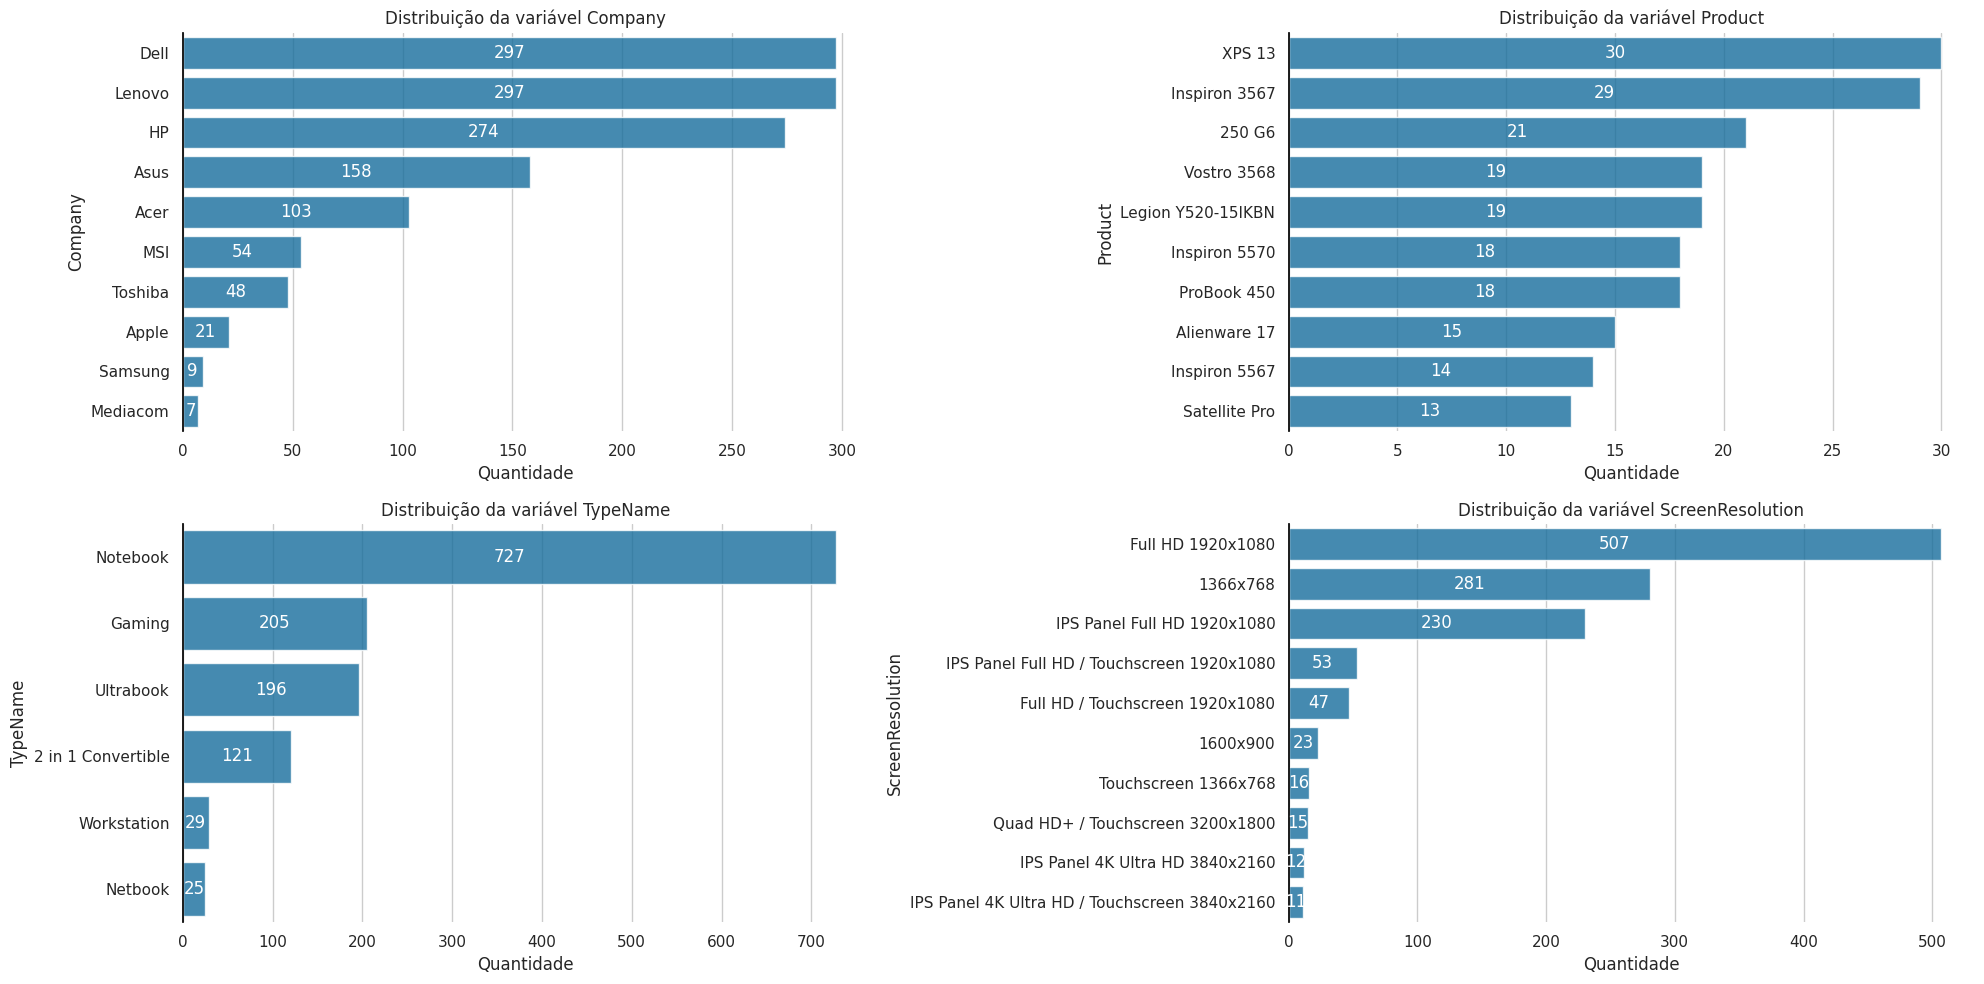

In [57]:
# @title Variáveis qualitativas
variaveis_qualitativas = df_dict_prices.query("tipo == 'qualitativa'").variavel.to_list()

# Seleciona apenas as 4 primeiras variáveis qualitativas para plotar no grid
variaveis_para_plotar = variaveis_qualitativas[:4]

fig, axes = plt.subplots(figsize=(20, 10), ncols=2, nrows=2)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_para_plotar):
    order = df_prices_latop[variavel].value_counts().index[:10] # Top 10 para evitar sobrecarga
    # Criar a figura
    ax = sns.countplot(df_prices_latop, y=variavel, ax=axes[i], order=order, alpha=.8)
    ax.bar_label(ax.containers[0], fmt="%d", color="white", label_type="center")
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")

# Remove eixos não utilizados se houver menos de 4 variáveis plotadas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()



```
# Isto está formatado como código
```

---
 - As três fabricantes mais frequentes são Dell(297), Lenovo(297) e HP (274) ;
 - Dos 10 modelos mais frequentes, 06 são da fabricante `Dell` sendo eles: `XPS 13`(30), `Inspiron 3567`(29), `Vostro 3568` (19), `Inspiron 5570`(18),  `Alienware 17`(15), `Inspiron 5567`(14) ;
 - Notebooks Aparecem com maior frequencia entre os tipos de laptops
 - A resolusão de tela mais frequencia é  `Full HD 1920x1080`
---

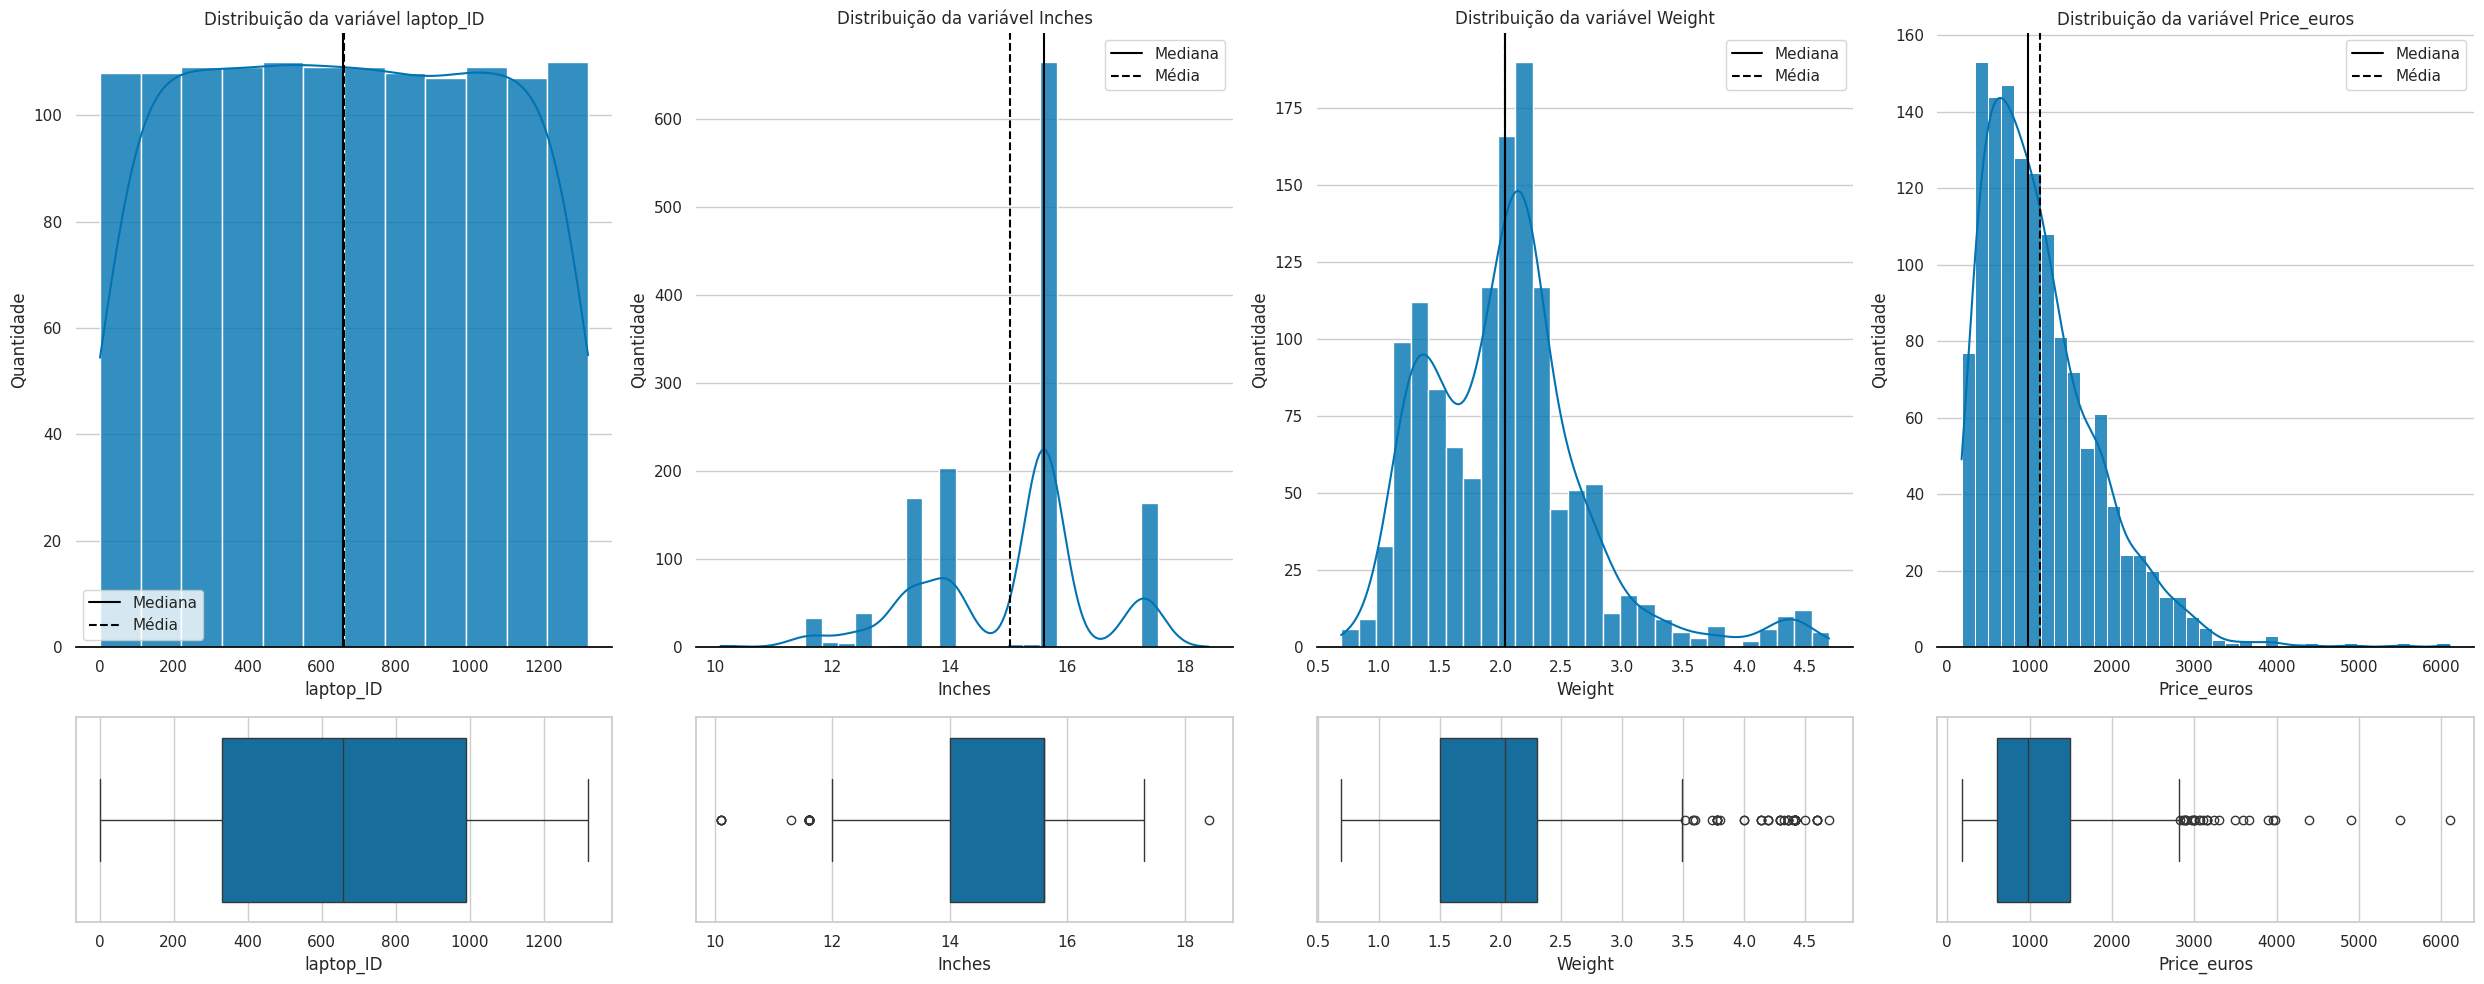

In [62]:
# @title Variáveis quantitativas
variaveis_quantitativas = df_dict_prices.query("tipo == 'quantitativa'").variavel.to_list()

fig, axes = plt.subplots(figsize=(15, 5), ncols=4, nrows=2, gridspec_kw={"height_ratios": [3, 1]})
axes = axes.flatten()

for i, variavel in enumerate(variaveis_quantitativas):
    # Plotando histogramas na linha superior (índices 0 a 3 no array achatado)
    ax = sns.histplot(data=df_prices_latop, x=variavel, ax=axes[i], kde=True, alpha=.8)
    ax.axvline(df_prices_latop[variavel].median(), color="black", label="Mediana")
    ax.axvline(df_prices_latop[variavel].mean(), color="black", linestyle="--", label="Média")
    ax.set(title=f"Distribuição da variável {variavel}", ylabel="Quantidade")
    ax.legend()
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

    # Plotando boxplots na linha inferior (índices 4 a 7 no array achatado)
    ax = sns.boxplot(data=df_prices_latop, x=variavel, ax=axes[i + len(variaveis_quantitativas)])
    ax.set(xlabel=variavel) # Define o rótulo do eixo x para os boxplots

plt.tight_layout()
plt.show()

---
Distribuição da variável `total_bill`
- A maioria das contas está entre 10 e 20 dólares
- Existem contas que passam de 40 dolares, elas são consideradas anomalias
- A distribuição é assimétrica para a direita.

Distribuição da variável `tip`
 - A maioria das gorjetas está entre 2 e 3 dólares
 - Existem gorjetas maiores que 6 dolares, tais gorgertas são consideradas anomalias

Distribuição da variável `size`
 - A moda para esta variável é 2
 - Mesas com tamanhos 5 e 6 são casos raros
---

### Dados faltantes

In [ ]:
df.isnull().sum()

---

Não existem dados faltantes

---

## Análise bivariada

### Relação entre variáveis quantitativas

In [ ]:
# @title Comportamento par a par

combinacoes = itertools.combinations(variaveis_quantitativas, 2)

fig, axes = plt.subplots(figsize=(10,3), ncols=3, nrows=1, squeeze=False)
axes = axes.flatten()
for i, (var_1, var_2) in enumerate(combinacoes):
    subtipos = df_dict.query('variavel == [@var_1, @var_2]').subtipo.to_list()
    if len(set(subtipos)) == 1:
        ax = sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i])
    else:
        ax = sns.boxplot(data=df, y=var_1, x=var_2, ax=axes[i])
    ax.set(title=f"Relação entre {var_2} e {var_1}")
plt.tight_layout()
plt.show()

---
 - Existe uma relação crescente entre as variáveis quantitativas
 - A variável `size` varia de maneira crescente em relação as vavariáveis `total_bill` e `tip`.
 - Existem valores discrepantes para a relação (`size` x `total_bill`) quando `size` é `[2, 3, 5]`.
 - Existem valores discrepantes para a relação (`size` x `tip`) quando `size` é `[2, 3, 4, 6]`.
---

In [ ]:
# @title Correlação
corr = df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True
)
plt.show()

---
 - A relação entre as correlações é `Corr(total_bill,tip) > Corr(total_bill,size) > Corr(size,tip)`
---

### Relação entre variáveis qualitativas

In [ ]:
# @title Contingência
sns.set_style('whitegrid')
combinacoes = sorted(
    itertools.combinations(variaveis_qualitativas, 2),
    key=lambda x: x[1]
)

fig, axes = plt.subplots(figsize=(12,7), ncols=3, nrows=2, squeeze=False)
axes = axes.flatten()
for i, (var_1, var_2) in enumerate(combinacoes):
    # display(Markdown(f"### Relação ({var_1} x {var_2})"))
    # display(pd.crosstab(df[var_1], df[var_2], normalize=True)*100)
    order = None
    hue_order = None
    if var_2 == 'day':
        hue_order = ['Thur', 'Fri', 'Sat', 'Sun']
    elif var_2 == 'time':
        hue_order = ['Lunch', 'Dinner']
    if var_1 == 'day':
        order = ['Thur', 'Fri', 'Sat', 'Sun']
    ax = sns.countplot(df, x=var_1, hue=var_2, ax=axes[i], hue_order=hue_order, order=order, palette=palette_dict[var_2])
    for container in ax.containers:
        ax.bar_label(container, fmt="%d", fontsize=9)#, color="white", label_type="center")
    ax.set(
        title=f"{var_1} x {var_2}",
        ylabel="Quantidade"
    )
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("black")
    sns.move_legend(
        axes[i], "lower center",
        bbox_to_anchor=(.5, -.6), ncol=4, title=None,
    )
plt.suptitle("Contingência das variáveis qualitativas")
plt.tight_layout()
plt.show()

---
 - Pagantes com `sex=Male` frequentam mais aos sábados (`day=Sat`) e domingos (`day=Sun`), enquanto pagantes com `sex=Female` têm distribuição mais equilibrada.
 - Fumantes (`smoker=Yes`) aparecem mais aos sábados (`day=Sat`), enquanto as sextas-feiras (`day=Fri`) têm menos fumantes (`smoker=No`).
 - Pagantes com `sex=Male` fumam mais que pagantes com `sex=Female`.
 - O jantar (`time=Dinner`) é mais popular que o almoço (`time=Lunch`), principalmente entre os pagantes com `sex=Male`.
 - A maioria dos fumantes (`smoker=Yes`) também prefere jantar (`time=Dinner`).
 - O almoço ocorre principalmente nos fins de semana, enquanto nos dias úteis quase não há registros.
---

### Relação entre variáveis quantitativas e qualitativas

In [ ]:
# @title Distribuição relativa
def kde_plot(df, x, y, axe, i):
    order = None
    palette = palette_dict.get(x)
    if x == 'day':
        order = ['Thur', 'Fri', 'Sat', 'Sun']
    elif x == 'time':
        order = ['Lunch', 'Dinner']
    legend = True if ((i+1)%3==0) else False
    ax = sns.kdeplot(
        data=df, x=y, hue=x, hue_order=order, cut=0,
        multiple="fill", palette=palette, ax=axe, legend=legend
    )
    ax.set(
        # title=f"{y} vs {x}" if i<3 else "",
        ylabel=x,
        xlabel=y if i>8 else "",
    )
    for side in ["left", "top", "right", "bottom"]:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color("black")
    if ((i+1)%3==0):
        # ax.set(xlabel=y)
        sns.move_legend(
            axes[i], "lower left", ncol=1, title=None,
            bbox_to_anchor=(1, 0), frameon=False
        )

combinacoes = list(itertools.product(variaveis_qualitativas, variaveis_quantitativas))

fig, axes = plt.subplots(figsize=(10,7), ncols=3, nrows=4, squeeze=False, sharey=True)
axes = axes.flatten()
for i, (var_qualitativa, var_quantitativa) in enumerate(combinacoes):
    kde_plot(df, var_qualitativa, var_quantitativa, axes[i], i)
plt.suptitle('Distribuições relativa das variáveis quantitativas sob as qualitativas')
plt.tight_layout()
plt.show()

---

 - Pagantes `Male` parecem ter mais contas altas e gorjetas maiores do que `Female`, o que pode indicar que gastam mais ou frequentam o restaurante em grupos maiores.
 - Não fumantes (`smoker=No`) são mais frequentes na maioria das faixas de valores, mas fumantes (`smoker=Yes`) aparecem proporcionalmente mais em contas (`total_bill`) e gorjetas (`tip`) altas.
 - O sábado (`day=Sat`) e o domingo (`day=Sun`) têm uma proporção maior de contas (`total_bill`) e gorjetas (`tip`) mais altas.
 - O jantar (`time='Dinner`) é predominante nos valores mais altos de (`total_bill`) e gorjetas (`tip`).

---

In [ ]:
# combinacoes = list(itertools.product(variaveis_quantitativas, variaveis_qualitativas))

# fig, axes = plt.subplots(figsize=(10,5), ncols=4, nrows=3, squeeze=False)
# axes = axes.flatten()
# for i, (var_qualitativa, var_quantitativa) in enumerate(combinacoes):
#     order = None
#     if var_quantitativa == 'day':
#         order = ['Thur', 'Fri', 'Sat', 'Sun']
#     elif var_quantitativa == 'time':
#         order = ['Lunch', 'Dinner']
#     ax = sns.barplot(
#         df, x=var_qualitativa, y=var_quantitativa,
#         ax=axes[i], order=order, #estimator="sum", errorbar=None
#     )
#     for container in ax.containers:
#         ax.bar_label(container, fmt="%.1f", color="white", label_type="center", fontsize=9)

#     for side in ["bottom", "top", "right"]:
#         ax.spines[side].set_visible(False)
#     ax.spines["left"].set_color("black")
# plt.suptitle("Relação entre variáveis quantitativas e qualitativas")
# plt.tight_layout()
# plt.show()

## Análise multivariada

In [ ]:
# @title Distribuição conjunta
g = sns.PairGrid(
    df, y_vars=variaveis_quantitativas, x_vars=variaveis_qualitativas, hue='sex',
    height=3
)
g.fig.set_size_inches(12, 8)
g.map(sns.violinplot, split=True, inner="quart", gap=.1, cut=0, legend=True),

# Ajustando título e layout
plt.suptitle('Relação entre variáveis quantitativas e qualitativas')
plt.tight_layout()  # Reservando espaço para a legenda
g.add_legend()
plt.savefig('algo.pdf')

---
 - Pagantes com `sex=Male` tendem a gastar um pouco mais no total da conta em comparação com pagantes com `sex=Female`, mas as distribuições são relativamente próximas.
 - A distribuição das gorjetas parece variar entre fumantes (`smoker=Yes`) e não fumantes (`smoker=No`).
 - No jantar (`time=Dinner`), os grupos tendem a ser ligeiramente maiores do que no almoço (`time=Lunch`), e homens costumam estar em grupos maiores.
 ---

In [ ]:
# @title Contingência
sns.set_style('whitegrid')
combinacoes = sorted(
    itertools.combinations(variaveis_qualitativas, 2),
    key=lambda x: x[1]
)

fig, axes = plt.subplots(figsize=(12,7), ncols=3, nrows=2, squeeze=False)
axes = axes.flatten()
for i, (var_1, var_2) in enumerate(combinacoes):
    # display(Markdown(f"### Relação ({var_1} x {var_2})"))
    # display(pd.crosstab(df[var_1], df[var_2], normalize=True)*100)
    order = None
    hue_order = None
    if var_2 == 'day':
        hue_order = ['Thur', 'Fri', 'Sat', 'Sun']
    elif var_2 == 'time':
        hue_order = ['Lunch', 'Dinner']
    if var_1 == 'day':
        order = ['Thur', 'Fri', 'Sat', 'Sun']
    ax = sns.boxplot(
        df, x=var_1, y='tip', hue=var_2, gap=.1,
        ax=axes[i], hue_order=hue_order, order=order
    )
    ax.set(
        title=f"{var_1} x {var_2} x tip",
        # ylabel="Quantidade"
    )
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("black")
    sns.move_legend(
        axes[i], "lower center",
        bbox_to_anchor=(.5, -.6), ncol=4, title=None,
    )
plt.suptitle("Contingência das variáveis qualitativas")
plt.tight_layout()
plt.show()

---
 - Não há uma diferença clara nos valores de gorjetas entre fumantes e não fumantes, embora fumantes tenham uma leve tendência a gorjetas mais altas nos fins de semana
 - Independentemente do sexo ou se o cliente é fumante ou não, as gorjetas durante o jantar são geralmente maiores do que no almoço.
 - Sábado e domingo são os dias que apresentam a maior dispersão de valores de gorjetas, com mais ocorrências de gorjetas altas, especialmente para homens e durante o jantar.

---

## Sumário de insights e hipóteses
 - Sábado `(day=Sat)` é o dia com mais clientes e contas altas, enquanto o jantar `(time=Dinner)` é mais popular que o almoço `(time=Lunch)`.
 - A maioria dos clientes são homens `(sex=Male)` e não fumantes `(smoker=No)`. Fumantes `(smoker=Yes)` tendem a dar gorjetas mais altas nos fins de semana.
 - A maior parte das contas `(total_bill)` varia de 10 a 20 dólares, com algumas anomalias acima de 40 dólares. Gorjetas (`tip`) estão entre 2 e 3 dólares, e a maioria das mesas (`size`) tem 2 pessoas.
 - Há uma relação crescente entre `size`, `total_bill` e `tip`, com discrepâncias em algumas combinações de `size` e `total_bill`/`tip`.
 - Homens `(sex=Male)` gastam mais no total da conta `(total_bill)` e dão gorjetas (`tip`) maiores. Fumantes `(smoker=Yes)` são mais frequentes em contas altas, especialmente no jantar `(time=Dinner)`.